In [1]:
from pydantic import BaseModel
from typing import List, Optional, Union, Set
from app import create_app, db
from app.models import Akteur
from app.models import Doc as Document
from app.src.d00_utils.preproc import clean_corpus_db, remove_empty_docs
from pathlib import Path
import seaborn as sns
from logzero import setup_logger
import os
import random
import datetime

os.environ["FLASK_CONFIG"] = 'development'
app = create_app('default')
app.app_context().push()

In [2]:
docs = Document.query.all()

In [3]:
remove_empty_docs(docs)

36 documents deleted.


In [4]:
# docs = db.session.query(Document).filter(Document.corpus == 'presse').all()
# docs = random.sample(docs, 100)
# clean_corpus_db(docs)

In [5]:
clean_corpus_db(docs)

Corpus cleaned. These non-ASCII characters are left:
{'Ö', 'Ü', 'ä', 'ß', 'ü', 'Ä', 'ö'}


In [6]:
db.session.commit()

/home/philippy/anaconda3/envs/dsc/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

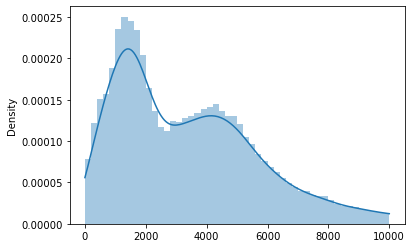

In [7]:
# histogram of document lengths
import seaborn as sns

docs = Document.query.all()
lens = []
for doc in docs:
    lens.append(len(doc.text))

sns.distplot(lens, kde=True, hist=True, kde_kws={"clip": (0, 10_000)}, hist_kws={"range": [0,10_000]})

In [8]:
# check for na dates
docs = db.session.query(Document).filter(Document.date == datetime.date(2021, 12, 31)).all()
docs

[]

In [9]:
# check twitter
docs = db.session.query(Document).filter(Document.corpus == 'twitter').all()
docs = random.sample(docs, 100)

for doc in docs:
    print(doc.autor, doc.date, doc.autor.party, doc.corpus, doc.filename)
    print(doc.text)
    print('')

akteur sabine leidig 2014-03-31 DIE LINKE twitter twitter_010391.txt
Der Zaun um die neue EZB ist jetzt aber hübsch geworden ! NoTroika Blockupy via Blockupy Für 10 Euro pro Kopf und Monat ? Nicht mit uns ! TTIP stoppen ! via Attac TTIP Attac friends Attacd Krim Krise kann kein Argument für Fracking sein ! Aktion 100 000 Hände gegen Fracking via BWassertisch Video zur Demo Energiewende retten ! Energiewende potsdam Deutsche Bahn als Flächenbahn ausbauen modernes InterRegio Netz S21 stoppen Auslandsengagement verkaufen ! Alternativer Bahn Geschäftsbericht 2013 des Bündnisses Bahn für Alle : Massive Überstunden, zu wenig Personal ! Ernüchternde Bahn Bilanz : Stagnation im Umsatz, Einbrüche beim Geschäft im Ausland und eine Halbierung des Gewinns Wie die Energiewende gerettet werden kann Heise Newsticker energiewende via Anti Atom News telepolis news Elektoraler Tsunami in Serbien . Von Boris Kanzleiter, Belgrad . Wahlen Balkan via rosaluxstiftung TV Tipp : Böse Miene Gutes Geld : Das sch

In [10]:
# check presse
docs = db.session.query(Document).filter(Document.corpus == 'presse').all()
docs = random.sample(docs, 100)

for doc in docs:
    print(doc.autor, doc.date, doc.autor.party, doc.corpus, doc.filename)
    print(doc.text)
    print('')

akteur thomas sattelberger 2019-03-15 FDP presse presse_014065.txt
Scholz dreht Innovationen den Hahn zu Zu den Medienberichten, wonach Bundesfinanzminister Scholz Künstliche Intelligenz nicht mit zusätzlichen Mitteln fördern will, erklärt der innovations und forschungspolitische Sprecher der FDP Fraktion Dr h .c . Thomas Sattelberger : Bundesfinanzminister Scholz begräbt das Thema Künstliche Intelligenz . Für Subventionen und Rentengeschenke macht er zusätzliche Milliarden locker, Innovationen dreht er den Hahn zu . Dabei liegt Deutschland jetzt schon zurück : nicht nur hinter den USA und China, auch hinter Schweden und der Schweiz . Scholz bremst die einst weltgrößte Exportwirtschaft brutal aus . Der SPD ist offenbar jeglicher wirtschaftliche Sachverstand abhandengekommen . Die FDP Fraktion fordert deshalb mehr Investitionen, eine echte KI Strategie der Bundesregierung und mehr europäische Kooperation .

akteur alexander gauland 2018-07-29 AfD presse presse_009336.txt
Gauland : Salvi

In [11]:
# check plenar
docs = db.session.query(Document).filter(Document.corpus == 'plenar').all()
docs = random.sample(docs, 100)

for doc in docs:
    print(doc.autor, doc.date, doc.autor.party, doc.corpus, doc.filename)
    print(doc.text)
    print('')

akteur tobias pflüger 2018-04-26 DIE LINKE plenar plenar_033671.txt
Frau Präsidentin ! Liebe Kolleginnen und Kollegen ! Wir stimmen gleich über den Einsatz EU NAVFOR Somalia Operation Atalanta ab . Dieser Einsatz findet im Rahmen der Europäischen Union statt . Die EU ist eines derjenigen Militärbündnisse, das Sie als Bundesregierung für den Einsatz der Bundeswehr nutzen . Auslandseinsätze der Bundeswehr finden im Rahmen der NATO, der EU, der UN und entgegen des Urteils des Bundesverfassungsgerichts vom 12 Juli 1994 auch rein national statt, so wie der unsägliche Einsatz zur Bewaffnung der Peschmerga, der vor kurzem beendet wurde . Ja, Sie haben richtig gehört : Die Europäische Union ist ein Militärbündnis . das ist rein völkerrechtlich so . Wir kritisieren das . Deshalb wollen wir auch keine Militäreinsätze im Rahmen der Europäischen Union, und wir wollen keinen Ausbau der militärischen Komponente der EU, wie er gerade mit der PESCO vorangetrieben wird . Wir wollen gar keine militärisc

In [12]:
# compare with metadata
import pandas as pd
df_plenar = pd.read_json('app/data/corpus/plenar_meta.json', orient='index')
df_presse = pd.read_json('app/data/corpus/presse_meta.json', orient='index')
df_twitter = pd.read_json('app/data/corpus/twitter_meta.json', orient='index')

In [13]:
df_twitter.loc['twitter_023864.txt']

datum                                                 1559260800000
screen_name                                           schneider_afd
file_id                                          twitter_023864.txt
agw_18                                                         None
agw_19                         b60e1f4f-c9f5-4832-a9f4-0c8b66a35b85
party                                                           AfD
profile_url       https://www.abgeordnetenwatch.de/profile/jorg-...
birth_year                                                     1964
first_name                                                     Jörg
last_name                                                 Schneider
gender                                                         male
education                                     Dipl.-Wirtschaftsing.
election_list                       Landesliste Nordrhein-Westfalen
name_res                                             jörg schneider
identifier        Schneider_AfD, JoergSchneiderM

In [22]:
from sqlalchemy.sql import func

db.session.query(func.max(Document.date)).first()

(datetime.date(2021, 12, 31))

In [ ]:
count = 0
for doc in docs:
    if len(doc.text) < 500:
        count += 1
        print(doc.text, doc.corpus)
        print()